In [14]:
import pandas as pd
import numpy as np

df = pd.read_excel('data/doanh_thu_merged.xlsx', header=0)  

print("First few rows of the data:", df.head())

print("\nShape of the DataFrame:", df.shape)

print("\nData types:", df.dtypes)

First few rows of the data:    Truoc_Web_Moi  Sau_Web_Moi
0           5.15         2.40
1           7.23         5.45
2           4.80         9.93
3           8.83         7.62
4           5.69         3.77

Shape of the DataFrame: (50, 2)

Data types: Truoc_Web_Moi    float64
Sau_Web_Moi      float64
dtype: object


In [15]:
print("\nSummary statistics:", df.describe())

print(f"\nMean Truoc_Web_Moi: {df['Truoc_Web_Moi'].mean()}")
print(f"Mean Sau_Web_Moi: {df['Sau_Web_Moi'].mean()}")


Summary statistics:        Truoc_Web_Moi  Sau_Web_Moi
count       50.00000    50.000000
mean         6.95600     8.046400
std          3.86938     3.927707
min          2.38000     2.400000
25%          4.34000     5.162500
50%          5.46000     7.320000
75%          8.94250    11.025000
max         15.92000    15.920000

Mean Truoc_Web_Moi: 6.9559999999999995
Mean Sau_Web_Moi: 8.0464


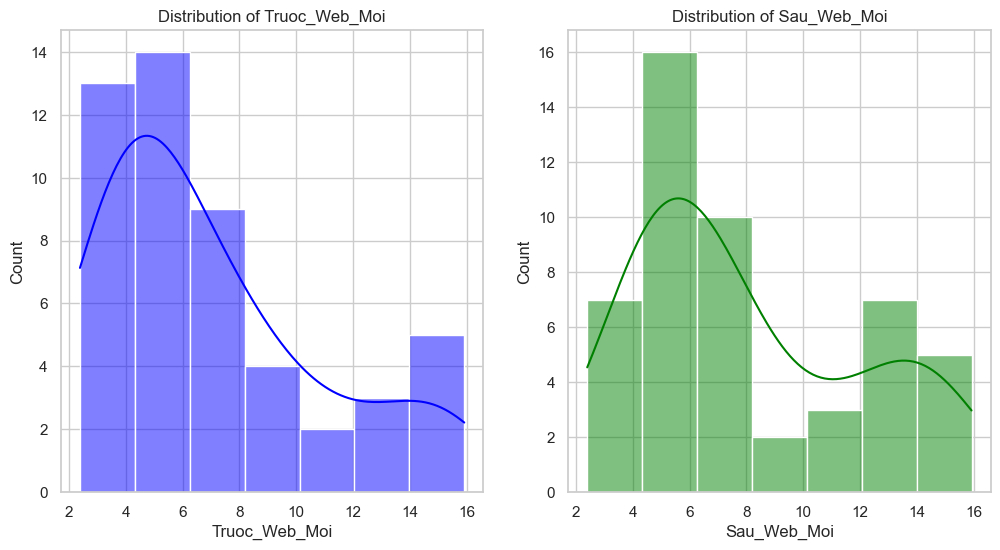

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Truoc_Web_Moi'], kde=True, color='blue')
plt.title('Distribution of Truoc_Web_Moi')

plt.subplot(1, 2, 2)
sns.histplot(df['Sau_Web_Moi'], kde=True, color='green')
plt.title('Distribution of Sau_Web_Moi')
plt.show()

In [17]:
df_melt = pd.melt(df, value_vars=['Truoc_Web_Moi', 'Sau_Web_Moi'],
                  var_name='Group', value_name='Revenue')

In [18]:
observed_diff = (df_melt[df_melt['Group'] == 'Sau_Web_Moi']['Revenue'].mean() 
                 - df_melt[df_melt['Group'] == 'Truoc_Web_Moi']['Revenue'].mean())

In [19]:
def permutation_test(data, group_col, value_col, n_permutations=5000):
    perm_diffs = []
    for _ in range(n_permutations):
        # Shuffle group labels while maintaining original group sizes
        shuffled_group = data[group_col].sample(frac=1, replace=False).reset_index(drop=True)
        shuffled_data = data.copy()
        shuffled_data[group_col] = shuffled_group
        
        # Calculate group means
        means = shuffled_data.groupby(group_col)[value_col].mean()
        perm_diff = means['Sau_Web_Moi'] - means['Truoc_Web_Moi']
        perm_diffs.append(perm_diff)
    return np.array(perm_diffs)

In [20]:
perm_diffs = permutation_test(df_melt, 'Group', 'Revenue')

In [21]:
p_value = np.mean(perm_diffs >= observed_diff)

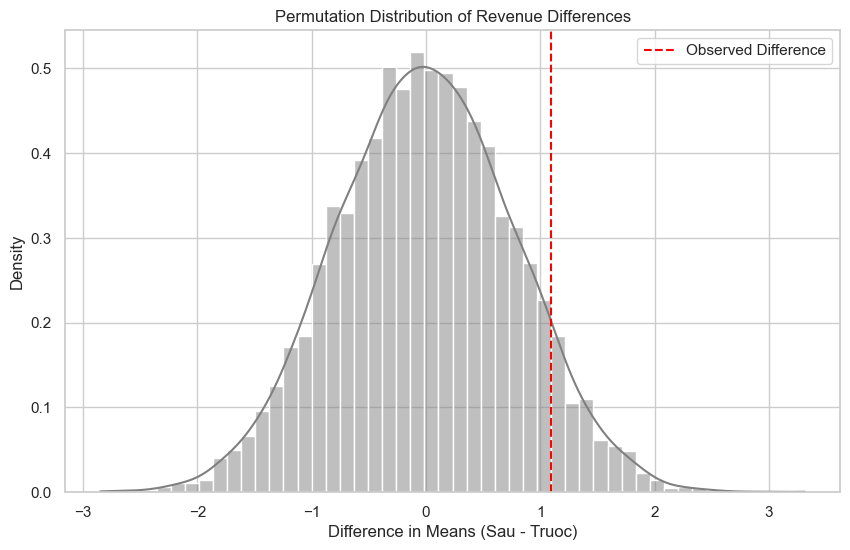

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(perm_diffs, kde=True, color='gray', stat='density')
plt.axvline(observed_diff, color='red', linestyle='--', label='Observed Difference')
plt.title('Permutation Distribution of Revenue Differences')
plt.xlabel('Difference in Means (Sau - Truoc)')
plt.ylabel('Density')
plt.legend()
plt.show()

In [23]:
print(f"Observed Difference: {observed_diff:.2f}")
print(f"Permutation Test p-value: {p_value:.4f}")

Observed Difference: 1.09
Permutation Test p-value: 0.0784


In [24]:
alpha = 0.05
if p_value < alpha:
    print("\nConclusion: Reject null hypothesis - Significant difference exists.")
else:
    print("\nConclusion: Fail to reject null hypothesis - No significant difference.")


Conclusion: Fail to reject null hypothesis - No significant difference.
